# Example code to plot histogram in log-space

In [1]:
# Import relevant packages
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

#### Get the data from the FITS file using astropy's fits functionality. I also exclude any NaNs, and discard pixels below a certain threshold.

In [5]:
filename      = 'continuum.clean.1e5iter.4em4jy.12m_7m.image.galactic.feather.fits'
data          = fits.getdata(filename)
dat           = data[~np.isnan(data)]
d_0           = dat[dat > 1e-4]

#### Create histogram and specify number of bins.
#### Convert the bins to log-space, as this will ensure that the bins are evenly-space when shown on a log-log plot later.

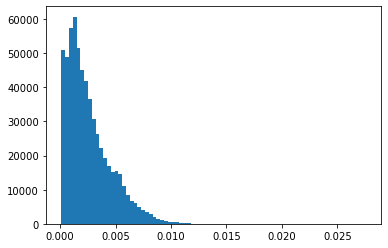

In [6]:
hist, bins, _ = plt.hist(d_0, bins=80)
logbins       = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
# Complete (not log!) histogram is shown below.

#### Plot the histogram on a log-log scale.

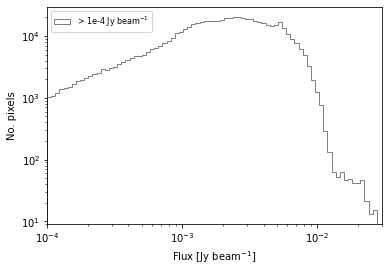

In [11]:
fig = plt.figure()
plt.hist(d_0, bins=logbins, histtype='step', ls='-', color='black', 
         alpha=0.5, label='> 1e-4 Jy beam$^{-1}$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-4, 3e-2)
plt.xlabel('Flux [Jy beam$^{-1}$]')
plt.ylabel('No. pixels')
plt.legend(loc="upper left",fontsize='8')
plt.show()

___

## Here's a figure of the continuum image that was used to generate the above.

In [12]:
import aplpy
import numpy as np
from astropy.io import fits
from astropy import units as u
import matplotlib.pyplot as plt

In [13]:
file = 'continuum.clean.1e5iter.4em4jy.12m_7m.image.galactic.feather.fits'
dat  = fits.getdata(file)
h    = fits.getheader(file)
bmaj = float(h['bmaj'])            # Major axis of beam ellipse
bmin = float(h['bmin'])            # Minor axis of beam ellipse
bpa  = float(h['bpa'])             # Position angle of beam ellipse

In [14]:
# Converts 1 parsec to degrees at the distance of the Galactic centre.
d       = 8100*u.pc
pc_sc   = ((1/d.value)*u.rad).to(u.deg).value

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -1.070e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.175e-02 [aplpy.core]


/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cm.set_bad(color)


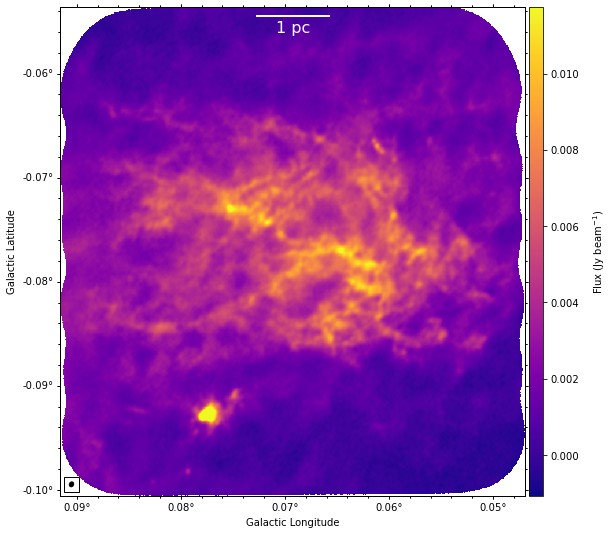

In [16]:
fig = aplpy.FITSFigure(file)
fig.show_colorscale(cmap='plasma',pmin=5,pmax=99.8)
fig.add_colorbar()
fig.colorbar.show()
fig.colorbar.set_axis_label_text('Flux (Jy beam$^{-1}$)')
fig.colorbar.set_axis_label_pad(12)
fig.add_scalebar(1*pc_sc)
fig.scalebar.show(1*pc_sc)
fig.scalebar.set_corner('top')
fig.scalebar.set_color('white')
fig.scalebar.set_label('1 pc')
fig.scalebar.set_font(size=16)
fig.scalebar.set_linewidth(2)
fig.ticks.set_color('black')
fig.add_beam()
fig.beam.show()
fig.beam.set_major(bmaj)  
fig.beam.set_minor(bmin)  
fig.beam.set_angle(bpa) 
fig.beam.set_corner('bottom left')
fig.beam.set_frame(True)
fig.beam.set_edgecolor('black')
fig.beam.set_facecolor('black')
fig.tick_labels.set_xformat('dd.dd')
fig.tick_labels.set_yformat('dd.dd')
fig.set_nan_color('white')